In [1]:
#######################################################################
# This script produces the figure for the two-dimensional synthetic examples in
# van den Boom and Thiery (2024, arXiv:2404.18556).
#######################################################################
%load_ext autoreload
%autoreload 2

import numpy as np
import jax.random as jr
import jax.numpy as jnp
import pylab as plt

import numpy as np
import matplotlib.pyplot as plt

# local imports
import sys
sys.path.append('../')

from util.ellipse import plot_ellipse
from dais.DAIS import DAIS as DAIS
from dais.proba.density import LogDensityGeneral

In [2]:
# initialize random number generator
key = jr.key(0)

In [3]:
## Create a Gaussian target density
dim = 100

# covariance and precision matrix
mu_1 = 1.*np.ones(dim)
Sigma_1 = 0.9*np.ones((dim,dim))
np.fill_diagonal(Sigma_1, 1.)
Sigma_1_inv = np.linalg.inv(Sigma_1)

def log_target_density(z):
    """
    Gaussian log density
    """
    z_centred = z - mu_1
    return -0.5 * jnp.dot(z_centred, Sigma_1_inv @ z_centred)

# create the log density object
logdensity = LogDensityGeneral(
                logdensity=log_target_density,
                dim=dim)

In [4]:
# initial mean/covariance
mu_init = np.zeros(dim)
Gamma_init = np.eye(dim)

# damping parameter
alpha_damp = 0.3

# number of smaples and number of iterations
n_samples = 100
n_iter = 100

# Effective Sample size threshold
ESS_threshold = 0.5

# initialize the method
dais = DAIS(logtarget=logdensity)

# run the method
key, key_ = jr.split(key)
output_dict = dais.run(
                key = key_,
                mu_init = mu_init,
                cov_init = Gamma_init,
                n_samples = n_samples,
                n_iter = n_iter,
                ess_threshold = ESS_threshold,
                alpha_damp = alpha_damp,
                verbose = True)

[00001/100] 	 eps: 0.01 	 ELBO: -355.46 	 ESS: 0.010
[00002/100] 	 eps: 0.01 	 ELBO: -335.32 	 ESS: 0.010
[00003/100] 	 eps: 0.02 	 ELBO: -315.98 	 ESS: 0.010
[00004/100] 	 eps: 0.02 	 ELBO: -310.85 	 ESS: 0.010
[00005/100] 	 eps: 0.02 	 ELBO: -303.16 	 ESS: 0.010
[00006/100] 	 eps: 0.02 	 ELBO: -275.41 	 ESS: 0.010
[00007/100] 	 eps: 0.02 	 ELBO: -268.86 	 ESS: 0.010
[00008/100] 	 eps: 0.02 	 ELBO: -251.17 	 ESS: 0.010
[00009/100] 	 eps: 0.02 	 ELBO: -248.38 	 ESS: 0.010
[00010/100] 	 eps: 0.02 	 ELBO: -220.39 	 ESS: 0.010
[00011/100] 	 eps: 0.03 	 ELBO: -223.38 	 ESS: 0.022
[00012/100] 	 eps: 0.02 	 ELBO: -205.86 	 ESS: 0.010
[00013/100] 	 eps: 0.03 	 ELBO: -187.90 	 ESS: 0.010
[00014/100] 	 eps: 0.03 	 ELBO: -183.01 	 ESS: 0.018
[00015/100] 	 eps: 0.04 	 ELBO: -176.75 	 ESS: 0.010
[00016/100] 	 eps: 0.03 	 ELBO: -168.41 	 ESS: 0.010
[00017/100] 	 eps: 0.04 	 ELBO: -157.60 	 ESS: 0.015
[00018/100] 	 eps: 0.04 	 ELBO: -141.78 	 ESS: 0.029
[00019/100] 	 eps: 0.03 	 ELBO: -136.12 	 ESS:

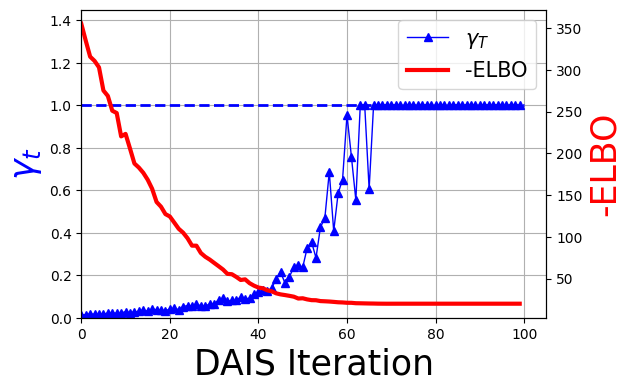

In [5]:
fig, ax_left = plt.subplots(figsize=(6,4))
ax_right = ax_left.twinx()

p1 = ax_left.plot(output_dict["eps_traj"], "-^", lw=1, color='blue', label=r"$\gamma_T$")
ax_left.plot([0, len(output_dict["eps_traj"])], [1,1], "--", lw=2, color='blue')
ax_left.set_ylim(0,1.45)
ax_left.set_xlim(left=0)
ax_left.set_ylabel(r"$\gamma_t$", fontsize=25, color="blue")
ax_left.set_xlabel("DAIS Iteration", fontsize=25)

ax_left.grid(True, which="major")



p2 = ax_right.plot(-np.array(output_dict["elbo_traj"]),
                    color='red', label="-ELBO", lw=3)
ax_right.set_ylabel("-ELBO", fontsize=25, color="red")


# added these three lines
lns = p1+p2
labs = [l.get_label() for l in lns]
ax_left.legend(lns, labs, loc=1, fontsize=25)


# added these three lines
lns = p1+p2
labs = [l.get_label() for l in lns]
ax_left.legend(lns, labs, loc=1, fontsize=15)

plt.savefig("gauss_monitor.pdf", dpi=200, bbox_inches='tight')